## **1.Dataset Input and Improvement**

- นำเข้าข้อมูลจากไฟล์ใน Google Drive และ ติดตั้ง sktime Library สำหรับใช้ในโปรเจค

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install sktime

- นำเข้า Library เช่น Pandas, Matplotlib และ sktime

In [ ]:
import pandas as pd
from pandas.tseries.offsets import MonthEnd
import matplotlib.pyplot as plt
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.performance_metrics.forecasting import make_forecasting_scorer
from sktime.forecasting.model_selection import ForecastingGridSearchCV
from sktime.split import ExpandingWindowSplitter
from sktime.performance_metrics.forecasting import mean_absolute_error
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import mean_squared_error

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Korean Garment Project/Transaction_value_of_Online_shopping_mall_by_the_groups_of_commodities_coverage_for_goods_20250312192444.csv')

- สำรวจชุดข้อมูลที่นำเข้ามา คอลัมน์ และ ตัวแปรภายในชุดข้อมูล
- ทำการปรับปรุงชุดข้อมูลให้พร้อมสำหรับการใช้งาน

In [ ]:
df

,Period,Clothing,Footwear,Fashion and accessories
0,Period,Total,Total,Total
1,2017.01,864515,103798,143439
2,2017.02,827672,118631,146885
3,2017.03,1042742,153293,165677
4,2017.04,972647,151628,165183
...,...,...,...,...
93,2024.09,1496773,273113,307413
94,2024.10,2100899,308040,326472
95,2024.11,2450946,391615,343849
96,2024.12 p),2266839,341205,410075


In [ ]:
df.head(10)

,Period,Clothing,Footwear,Fashion and accessories
0,Period,Total,Total,Total
1,2017.01,864515,103798,143439
2,2017.02,827672,118631,146885
3,2017.03,1042742,153293,165677
4,2017.04,972647,151628,165183
5,2017.05,978235,160562,168702
6,2017.06,909742,156160,162825
7,2017.07,887371,140746,170035
8,2017.08,758225,118311,178204
9,2017.09,959679,140246,170345


In [ ]:
df.tail(10)

,Period,Clothing,Footwear,Fashion and accessories
88,2024.04,1946970,335885,341279
89,2024.05,1850264,360707,355848
90,2024.06,1793015,313914,332937
91,2024.07,1660597,315956,357986
92,2024.08,1372080,272743,311349
93,2024.09,1496773,273113,307413
94,2024.10,2100899,308040,326472
95,2024.11,2450946,391615,343849
96,2024.12 p),2266839,341205,410075
97,2025.01 p),1537695,226079,326167


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Period                   98 non-null     object
 1   Clothing                 98 non-null     object
 2   Footwear                 98 non-null     object
 3   Fashion and accessories  98 non-null     object
dtypes: object(4)
memory usage: 3.2+ KB


In [ ]:
df.drop([df.index[96],df.index[97]] , inplace=True)

In [ ]:
df.drop([df.index[0]] , inplace=True)

In [ ]:
df.reset_index(drop=True)

,Period,Clothing,Footwear,Fashion and accessories
0,2017.01,864515,103798,143439
1,2017.02,827672,118631,146885
2,2017.03,1042742,153293,165677
3,2017.04,972647,151628,165183
4,2017.05,978235,160562,168702
...,...,...,...,...
90,2024.07,1660597,315956,357986
91,2024.08,1372080,272743,311349
92,2024.09,1496773,273113,307413
93,2024.10,2100899,308040,326472


In [ ]:
df['Period'] = pd.to_datetime(df['Period'])

<ipython-input-191-5f1ccaac49b3>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Period'] = pd.to_datetime(df['Period'])


In [ ]:
df

,Period,Clothing,Footwear,Fashion and accessories
1,2017-01-01,864515,103798,143439
2,2017-02-01,827672,118631,146885
3,2017-03-01,1042742,153293,165677
4,2017-04-01,972647,151628,165183
5,2017-05-01,978235,160562,168702
...,...,...,...,...
91,2024-07-01,1660597,315956,357986
92,2024-08-01,1372080,272743,311349
93,2024-09-01,1496773,273113,307413
94,2024-10-01,2100899,308040,326472


In [ ]:
df['Period'] = df['Period'].dt.strftime('%Y%m%d').astype(int)

In [ ]:
df['Period'] = pd.to_datetime(df['Period'], format='%Y%m%d') + MonthEnd(1)

In [ ]:
df.reset_index(drop=True)

,Period,Clothing,Footwear,Fashion and accessories
0,2017-01-31,864515,103798,143439
1,2017-02-28,827672,118631,146885
2,2017-03-31,1042742,153293,165677
3,2017-04-30,972647,151628,165183
4,2017-05-31,978235,160562,168702
...,...,...,...,...
90,2024-07-31,1660597,315956,357986
91,2024-08-31,1372080,272743,311349
92,2024-09-30,1496773,273113,307413
93,2024-10-31,2100899,308040,326472


In [ ]:
df = df.set_index('Period')

In [ ]:
df

,Clothing,Footwear,Fashion and accessories
Period,,,
2017-01-31,864515,103798,143439
2017-02-28,827672,118631,146885
2017-03-31,1042742,153293,165677
2017-04-30,972647,151628,165183
2017-05-31,978235,160562,168702
...,...,...,...
2024-07-31,1660597,315956,357986
2024-08-31,1372080,272743,311349
2024-09-30,1496773,273113,307413


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95 entries, 2017-01-31 to 2024-11-30
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing                 95 non-null     object
 1   Footwear                 95 non-null     object
 2   Fashion and accessories  95 non-null     object
dtypes: object(3)
memory usage: 3.0+ KB


In [ ]:
df[['Clothing']] = df[['Clothing']].apply(pd.to_numeric)
df[['Footwear']] = df[['Footwear']].apply(pd.to_numeric)
df[['Fashion and accessories']] = df[['Fashion and accessories']].apply(pd.to_numeric)

In [ ]:
cg = df[['Clothing']]
fg = df[['Footwear']]
fag = df[['Fashion and accessories']]

- สร้างกราฟโดยใช้ Matplotlib

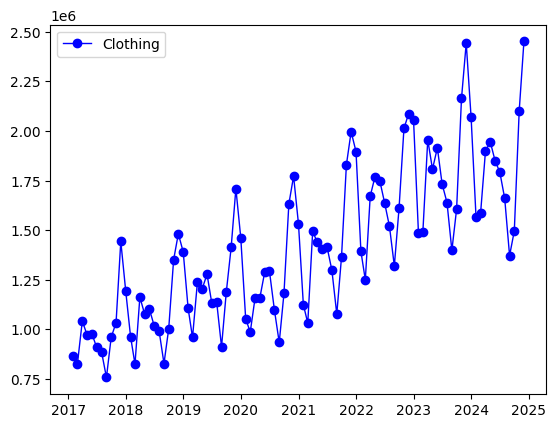

In [ ]:
plt.plot(cg,color='blue',label='Clothing',marker='o',linewidth=1)
plt.legend()

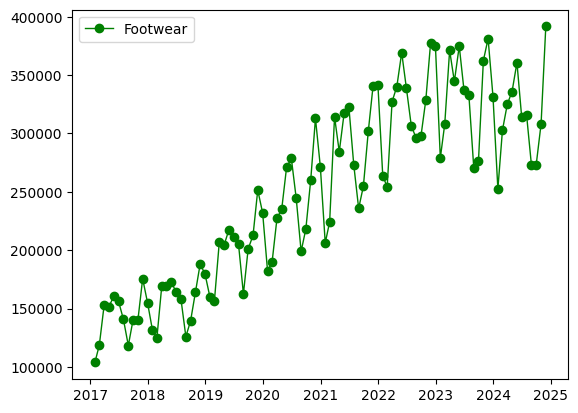

In [ ]:
plt.plot(fg,color='green',label='Footwear',marker='o',linewidth=1)
plt.legend()

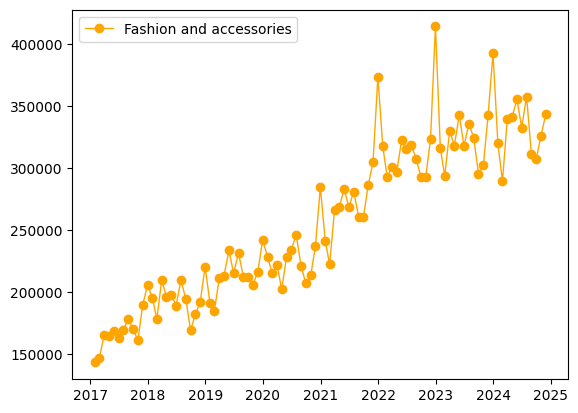

In [ ]:
plt.plot(fag,color='orange',label='Fashion and accessories',marker='o',linewidth=1)
plt.legend()

- แบ่งแยกชุดข้อมูลออกเป็นสามชุดข้อมูลย่อยตามชนิดของสินค้าที่ระบุไว้ในชุดข้อมูล

In [ ]:
clothing = df['Clothing']
footwear = df['Footwear']
fashionandaccessories = df['Fashion and accessories']

In [ ]:
clothing

,Clothing
Period,
2017-01-31,864515
2017-02-28,827672
2017-03-31,1042742
2017-04-30,972647
2017-05-31,978235
...,...
2024-07-31,1660597
2024-08-31,1372080
2024-09-30,1496773


In [ ]:
footwear

,Footwear
Period,
2017-01-31,103798
2017-02-28,118631
2017-03-31,153293
2017-04-30,151628
2017-05-31,160562
...,...
2024-07-31,315956
2024-08-31,272743
2024-09-30,273113


In [ ]:
fashionandaccessories

,Fashion and accessories
Period,
2017-01-31,143439
2017-02-28,146885
2017-03-31,165677
2017-04-30,165183
2017-05-31,168702
...,...
2024-07-31,357986
2024-08-31,311349
2024-09-30,307413


- แบ่งแยกชุดข้อมูลย่อยออกเป็นชุดข้อมูลย่อยสำหรับการฝึกเพื่อใช้ในการคำนวณการพยากรณ์ และ ชุดข้อมูลย่อยสำหรับการทดสอบสำหรับทดสอบผลลัพธ์ที่ได้จากการพยากรณ์เทียบความแตกต่างของข้อมูลจริงและข้อมูลจากการพยากรณ์

In [ ]:
clothing_train = clothing['2017-01-31':'2022-12-31']
clothing_test = clothing['2023-01-31':]

In [ ]:
clothing_train

,Clothing
Period,
2017-01-31,864515
2017-02-28,827672
2017-03-31,1042742
2017-04-30,972647
2017-05-31,978235
...,...
2022-08-31,1320197
2022-09-30,1611461
2022-10-31,2012768


In [ ]:
clothing_test

,Clothing
Period,
2023-01-31,1485952
2023-02-28,1491451
2023-03-31,1955829
2023-04-30,1807688
2023-05-31,1915142
2023-06-30,1733416
2023-07-31,1639509
2023-08-31,1398210
2023-09-30,1606402


In [ ]:
footwear_train = footwear['2017-01-31':'2022-12-31']
footwear_test = footwear['2023-01-31':]

In [ ]:
footwear_train

,Footwear
Period,
2017-01-31,103798
2017-02-28,118631
2017-03-31,153293
2017-04-30,151628
2017-05-31,160562
...,...
2022-08-31,295945
2022-09-30,297514
2022-10-31,328694


In [ ]:
footwear_test

,Footwear
Period,
2023-01-31,278985
2023-02-28,308003
2023-03-31,371195
2023-04-30,344515
2023-05-31,374791
2023-06-30,337147
2023-07-31,333004
2023-08-31,270805
2023-09-30,276470


In [ ]:
fashionandaccessories_train = fashionandaccessories['2017-01-31':'2022-12-31']
fashionandaccessories_test = fashionandaccessories['2023-01-31':]

In [ ]:
fashionandaccessories_train

,Fashion and accessories
Period,
2017-01-31,143439
2017-02-28,146885
2017-03-31,165677
2017-04-30,165183
2017-05-31,168702
...,...
2022-08-31,307539
2022-09-30,292988
2022-10-31,293429


In [ ]:
fashionandaccessories_test

,Fashion and accessories
Period,
2023-01-31,316390
2023-02-28,293703
2023-03-31,330225
2023-04-30,318319
2023-05-31,342980
2023-06-30,317978
2023-07-31,335902
2023-08-31,324621
2023-09-30,295736


# **2.Exponential Smoothing in Clothings, Footwear, Fashion and Accessories**

- ทำการสร้างสมการ Exponential Smoothing และ ประเมินผลลัพธ์การพยากรณ์เปรียบเทียบกับค่าจริงจากชุดข้อมูลย่อยสำหรับการทดสอบ

In [ ]:
fh=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

  **2.1.Clothing**

In [ ]:
clothing_tes_model = ExponentialSmoothing(trend='add',seasonal='add',sp=12,smoothing_level=0,smoothing_trend=0,smoothing_seasonal=0)
clothing_tes_model_fit = clothing_tes_model.fit(clothing_train)
clothing_tes_forecast = clothing_tes_model_fit.predict(fh)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


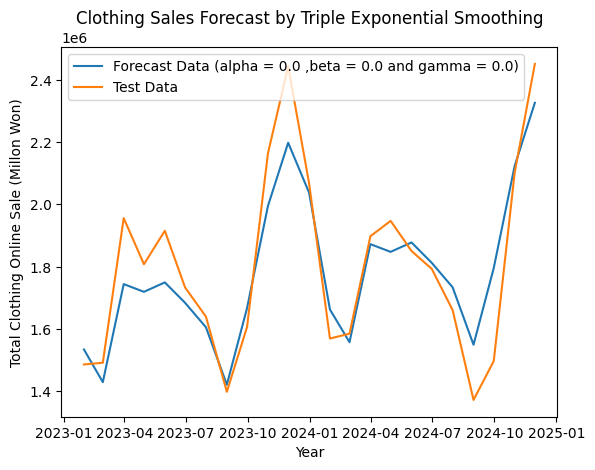

In [ ]:
plt.plot(clothing_tes_forecast, label='Forecast Data (alpha = 0.0 ,beta = 0.0 and gamma = 0.0)')
plt.plot(clothing_test, label='Test Data')
plt.xlabel('Year')
plt.ylabel('Total Clothing Online Sale (Millon Won)')
plt.title('Clothing Sales Forecast by Triple Exponential Smoothing')
plt.legend()
plt.show()

  **2.2.Footwear**

In [ ]:
footwear_tes_model = ExponentialSmoothing(trend='add',seasonal='add',sp=12,smoothing_level=0,smoothing_trend=0,smoothing_seasonal=0)
footwear_tes_model_fit = footwear_tes_model.fit(footwear_train)
footwear_tes_forecast = footwear_tes_model_fit.predict(fh)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


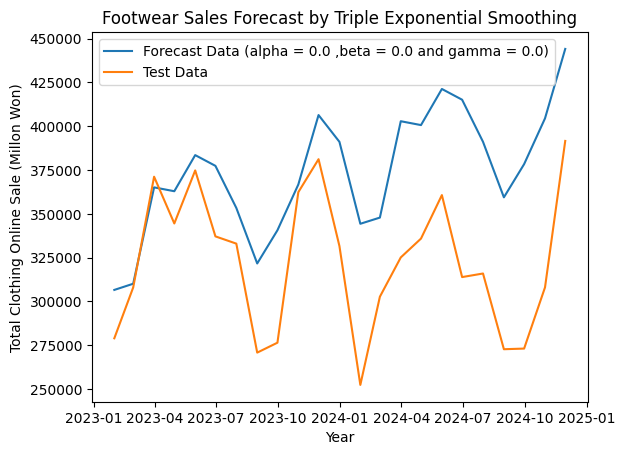

In [ ]:
plt.plot(footwear_tes_forecast, label='Forecast Data (alpha = 0.0 ,beta = 0.0 and gamma = 0.0)')
plt.plot(footwear_test, label='Test Data')
plt.xlabel('Year')
plt.ylabel('Total Clothing Online Sale (Millon Won)')
plt.title('Footwear Sales Forecast by Triple Exponential Smoothing')
plt.legend()
plt.show()

  **2.3.Fashion and Accessories**

In [ ]:
fashionandaccessories_tes_model = ExponentialSmoothing(trend='add',seasonal='add',sp=12,smoothing_level=0,smoothing_trend=0,smoothing_seasonal=0)
fashionandaccessories_tes_model_fit = fashionandaccessories_tes_model.fit(fashionandaccessories_train)
fashionandaccessories_tes_forecast = fashionandaccessories_tes_model_fit.predict(fh)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


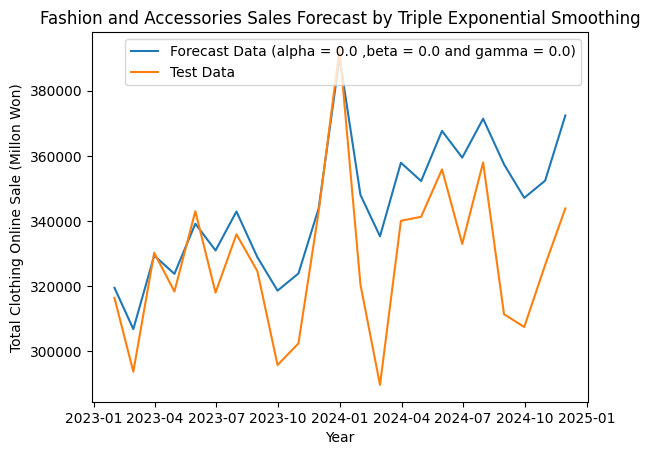

In [ ]:
plt.plot(fashionandaccessories_tes_forecast, label='Forecast Data (alpha = 0.0 ,beta = 0.0 and gamma = 0.0)')
plt.plot(fashionandaccessories_test, label='Test Data')
plt.xlabel('Year')
plt.ylabel('Total Clothing Online Sale (Millon Won)')
plt.title('Fashion and Accessories Sales Forecast by Triple Exponential Smoothing')
plt.legend()
plt.show()

**2.4.Model Evaluation**

In [ ]:
ces_mae = mean_absolute_error(clothing_test,clothing_tes_forecast)
fes_mae = mean_absolute_error(footwear_test,footwear_tes_forecast)
faes_mae = mean_absolute_error(fashionandaccessories_test,fashionandaccessories_tes_forecast)

In [ ]:
print("Forecast Evaluation")
print("---------------------------------------------")
print("Triple Exponential Smoothing")
print("MAE of the Clothing model is ",round(ces_mae,4))
print("MAE of the Footwear model is ",round(fes_mae,4))
print("MAE of the Fashion and Accessories model is ",round(faes_mae,4))

Forecast Evaluation
---------------------------------------------
Triple Exponential Smoothing
MAE of the Clothing model is  94618.8294
MAE of the Footwear model is  51528.2368
MAE of the Fashion and Accessories model is  17063.8232


# **3.Forecasting Gridsearch CV with the time series dataset**

- กำหนดพารามิเตอร์อ้างอิงจากพารามิเตอร์ที่ใช้ใน ExponentialSmoothing()
- หาโมเดลที่เหมาะสมจาก ForecastingGridSearchCV และ กำหนดให้หาโมเดลที่มีค่า Mean Absolute Error น้อยที่สุด

**3.1.Clothing**

In [ ]:
cv = ExpandingWindowSplitter(fh=fh)
parameter_grid = {"trend":["add","additive"],
                  "seasonal":["add","additive"],
                  "sp":[12],
                  "smoothing_level":[0,0.5,1.0],
                  "smoothing_trend":[0,0.5,1.0],
                  "smoothing_seasonal":[0,0.5,1.0]}
forecaster_model = ExponentialSmoothing()
gscescv = ForecastingGridSearchCV(forecaster=forecaster_model,param_grid=parameter_grid,cv=cv,scoring=make_forecasting_scorer(mean_absolute_error,greater_is_better=False))
gscescv.fit(clothing_train)
gscescv_prediction = gscescv.predict(fh)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [ ]:
print(gscescv.best_forecaster_)

ExponentialSmoothing(seasonal='add', smoothing_level=0, smoothing_seasonal=0.5,
                     smoothing_trend=0.5, sp=12, trend='add')


In [ ]:
gscescv_prediction

,Clothing
2023-01-31,1.492043e+06
2023-02-28,1.373058e+06
2023-03-31,1.756443e+06
2023-04-30,1.784170e+06
2023-05-31,1.787864e+06
2023-06-30,1.722782e+06
2023-07-31,1.608074e+06
2023-08-31,1.408371e+06
2023-09-30,1.685998e+06
2023-10-31,2.088501e+06


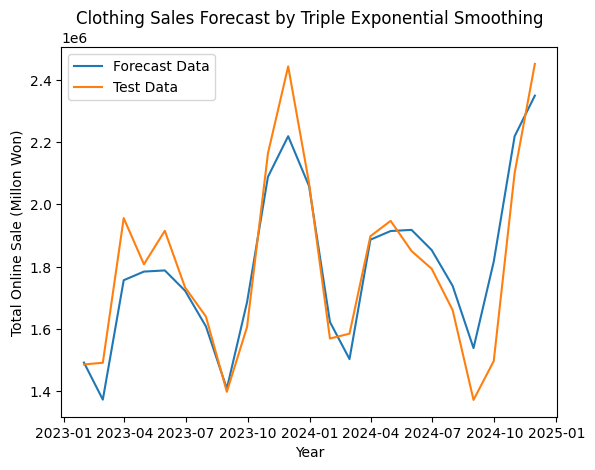

In [ ]:
plt.plot(gscescv_prediction, label='Forecast Data')
plt.plot(clothing_test, label='Test Data')
plt.xlabel('Year')
plt.ylabel('Total Online Sale (Millon Won)')
plt.title('Clothing Sales Forecast by Triple Exponential Smoothing')
plt.legend()
plt.show()

  **3.2.Footwear**

In [ ]:
cv = ExpandingWindowSplitter(fh=fh)
parameter_grid = {"trend":["add","additive"],
                  "seasonal":["add","additive"],
                  "sp":[12],
                  "smoothing_level":[0,0.5,1.0],
                  "smoothing_trend":[0,0.5,1.0],
                  "smoothing_seasonal":[0,0.5,1.0]}
forecaster_model = ExponentialSmoothing()
gsfescv = ForecastingGridSearchCV(forecaster=forecaster_model,param_grid=parameter_grid,cv=cv,scoring=make_forecasting_scorer(mean_absolute_error,greater_is_better=False))
gsfescv.fit(footwear_train)
gsfescv_prediction = gsfescv.predict(fh)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [ ]:
print(gsfescv.best_forecaster_)

ExponentialSmoothing(seasonal='add', smoothing_level=0.5,
                     smoothing_seasonal=1.0, smoothing_trend=0, sp=12,
                     trend='add')


In [ ]:
gsfescv_prediction

,Footwear
2023-01-31,275904.913992
2023-02-28,261743.820185
2023-03-31,349976.135326
2023-04-30,382043.467130
2023-05-31,387726.597077
2023-06-30,352255.114534
2023-07-31,338119.051953
2023-08-31,326897.627686
2023-09-30,314348.879345
2023-10-31,346346.154318


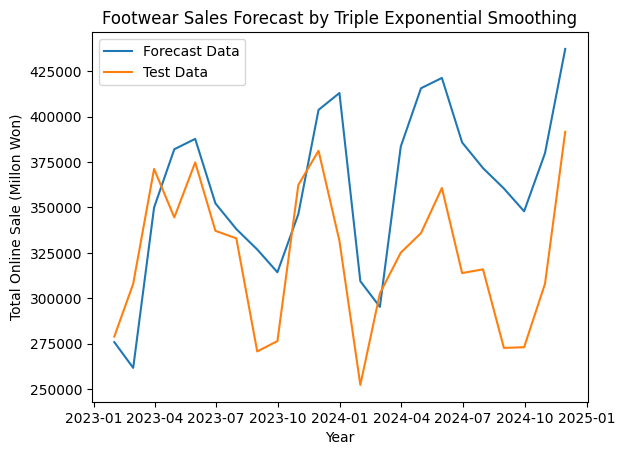

In [ ]:
plt.plot(gsfescv_prediction, label='Forecast Data')
plt.plot(footwear_test, label='Test Data')
plt.xlabel('Year')
plt.ylabel('Total Online Sale (Millon Won)')
plt.title('Footwear Sales Forecast by Triple Exponential Smoothing')
plt.legend()
plt.show()

  **3.3.Fashion and Accerssories**

In [ ]:
cv = ExpandingWindowSplitter(fh=fh)
parameter_grid = {"trend":["add","additive"],
                  "seasonal":["add","additive"],
                  "sp":[12],
                  "smoothing_level":[0,0.5,1.0],
                  "smoothing_trend":[0,0.5,1.0],
                  "smoothing_seasonal":[0,0.5,1.0]}
forecaster_model = ExponentialSmoothing()
gsfaescv = ForecastingGridSearchCV(forecaster=forecaster_model,param_grid=parameter_grid,cv=cv,scoring=make_forecasting_scorer(mean_absolute_error,greater_is_better=False))
gsfaescv.fit(fashionandaccessories_train)
gsfaescv_prediction = gsfaescv.predict(fh)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [ ]:
print(gsfaescv.best_forecaster_)

ExponentialSmoothing(seasonal='add', smoothing_level=0, smoothing_seasonal=0,
                     smoothing_trend=0, sp=12, trend='add')


In [ ]:
gsfaescv_prediction

,Fashion and accessories
2023-01-31,319472.763239
2023-02-28,306769.657207
2023-03-31,329372.477079
2023-04-30,323747.094032
2023-05-31,339151.507450
2023-06-30,330936.227464
2023-07-31,342900.659474
2023-08-31,328894.459418
2023-09-30,318582.556390
2023-10-31,323863.657961


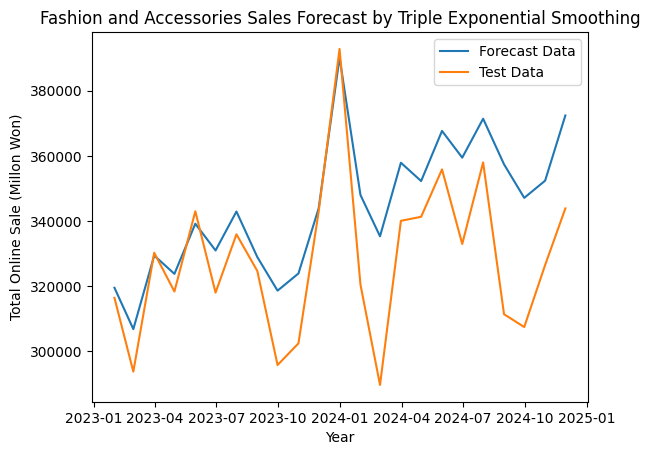

In [ ]:
plt.plot(gsfaescv_prediction, label='Forecast Data')
plt.plot(fashionandaccessories_test, label='Test Data')
plt.xlabel('Year')
plt.ylabel('Total Online Sale (Millon Won)')
plt.title('Fashion and Accessories Sales Forecast by Triple Exponential Smoothing')
plt.legend()
plt.show()

# **4.Models Evaluation**

- ประเมินผลการพยากรณ์จากโมเดล Exponential Smoothing จาก ForecastingGridsearchCV เปรียบเปรียบโมเดล Exponential Smoothing ที่สร้างขึ้นก่อน โดยใช้ Mean Absolute Error, Mean Absolute Percentage และ Mean Squared Error

  **4.1.Mean Absolute Error**

In [ ]:
bces_mae = mean_absolute_error(clothing_test,clothing_tes_forecast)
bfes_mae = mean_absolute_error(footwear_test,footwear_tes_forecast)
bfaes_mae = mean_absolute_error(fashionandaccessories_test,fashionandaccessories_tes_forecast)

In [ ]:
print("Forecast Evaluation")
print("Triple Exponential Smoothing (Before)")
print("MAE of the Clothing model is ",round(bces_mae,4))
print("MAE of the Footwear model is ",round(bfes_mae,4))
print("MAE of the Fashion and Accessories model is ",round(bfaes_mae,4))

Forecast Evaluation
Triple Exponential Smoothing (Before)
MAE of the Clothing model is  94618.8294
MAE of the Footwear model is  51528.2368
MAE of the Fashion and Accessories model is  17063.8232


In [ ]:
aces_mae = mean_absolute_error(clothing_test,gscescv_prediction)
afes_mae = mean_absolute_error(footwear_test,gsfescv_prediction)
afaes_mae = mean_absolute_error(fashionandaccessories_test,gsfaescv_prediction)

In [ ]:
print("Forecast Evaluation")
print("Triple Exponential Smoothing (After)")
print("MAE of the Clothing model is ",round(aces_mae,4))
print("MAE of the Footwear model is ",round(afes_mae,4))
print("MAE of the Fashion and Accessories model is ",round(afaes_mae,4))

Forecast Evaluation
Triple Exponential Smoothing (After)
MAE of the Clothing model is  87163.5649
MAE of the Footwear model is  44596.6816
MAE of the Fashion and Accessories model is  17063.8232


  **4.2.Mean Absolute Percentage Error**

In [ ]:
bces_mape = mean_absolute_percentage_error(clothing_test,clothing_tes_forecast,symmetric=False)
bfes_mape = mean_absolute_percentage_error(footwear_test,footwear_tes_forecast,symmetric=False)
bfaes_mape = mean_absolute_percentage_error(fashionandaccessories_test,fashionandaccessories_tes_forecast,symmetric=False)

In [ ]:
print("Forecast Evaluation")
print("Triple Exponential Smoothing (Before)")
print("MAPE of the Clothing model is ",round(bces_mape,4))
print("MAPE of the Footwear model is ",round(bfes_mape,4))
print("MAPE of the Fashion and Accessories model is ",round(bfaes_mape,4))

Forecast Evaluation
Triple Exponential Smoothing (Before)
MAPE of the Clothing model is  0.0528
MAPE of the Footwear model is  0.1687
MAPE of the Fashion and Accessories model is  0.0537


In [ ]:
aces_mape = mean_absolute_percentage_error(clothing_test,gscescv_prediction,symmetric=False)
afes_mape = mean_absolute_percentage_error(footwear_test,gsfescv_prediction,symmetric=False)
afaes_mape = mean_absolute_percentage_error(fashionandaccessories_test,gsfaescv_prediction,symmetric=False)

In [ ]:
print("Forecast Evaluation")
print("Triple Exponential Smoothing (After)")
print("MAPE of the Clothing model is ",round(aces_mape,4))
print("MAPE of the Footwear model is ",round(afes_mape,4))
print("MAPE of the Fashion and Accessories model is ",round(afaes_mape,4))

Forecast Evaluation
Triple Exponential Smoothing (After)
MAPE of the Clothing model is  0.0494
MAPE of the Footwear model is  0.1435
MAPE of the Fashion and Accessories model is  0.0537


  **4.3.Mean Squared Error**

In [ ]:
bces_mse = mean_absolute_percentage_error(clothing_test,clothing_tes_forecast,square_root=False)
bfes_mse = mean_absolute_percentage_error(footwear_test,footwear_tes_forecast,square_root=False)
bfaes_mse = mean_absolute_percentage_error(fashionandaccessories_test,fashionandaccessories_tes_forecast,square_root=False)

In [ ]:
print("Forecast Evaluation")
print("Triple Exponential Smoothing (Before)")
print("MSE of the Clothing model is ",round(bces_mse,4))
print("MSE of the Footwear model is ",round(bfes_mse,4))
print("MSE of the Fashion and Accessories model is ",round(bfaes_mse,4))

Forecast Evaluation
Triple Exponential Smoothing (Before)
MSE of the Clothing model is  0.0528
MSE of the Footwear model is  0.1687
MSE of the Fashion and Accessories model is  0.0537


In [ ]:
aces_mse = mean_absolute_percentage_error(clothing_test,gscescv_prediction,square_root=False)
afes_mse = mean_absolute_percentage_error(footwear_test,gsfescv_prediction,square_root=False)
afaes_mse = mean_absolute_percentage_error(fashionandaccessories_test,gsfaescv_prediction,square_root=False)

In [ ]:
print("Forecast Evaluation")
print("Triple Exponential Smoothing (After)")
print("MSE of the Clothing model is ",round(aces_mse,4))
print("MSE of the Footwear model is ",round(afes_mse,4))
print("MSE of the Fashion and Accessories model is ",round(afaes_mse,4))

Forecast Evaluation
Triple Exponential Smoothing (After)
MSE of the Clothing model is  0.0494
MSE of the Footwear model is  0.1435
MSE of the Fashion and Accessories model is  0.0537
